In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

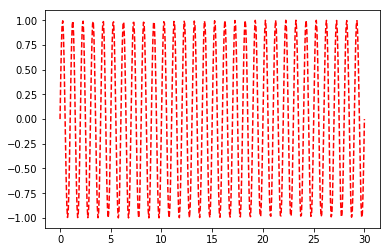

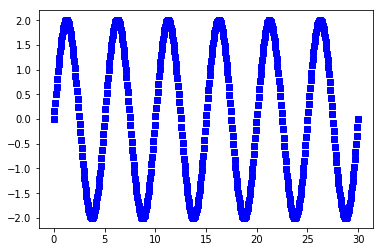

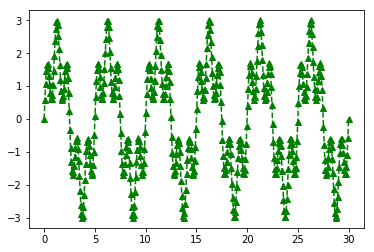

In [29]:
# a) Generation of clean synthetic signal:
# define sinusoid of length T (sec), with fundamental frequency F0 (Hz), sampled at Fs (Hz)

def sinusoid(Fs,F0,T):
    t=np.linspace(0,T,T*Fs) # Returns num evenly spaced samples, calculated over the interval [start, stop].
    return (t,np.sin(2*np.pi*F0*t)) # Returns a sinusoid defined at the inserted fundamental frequency.


# Define variables.
(T,Fs)=(30,15) # Define time and Frequency Sample
(F1,F2)=(1,0.2) # Define fundamental frequency at 1 Hz, Define fundamental frequency at 0.2 hz
(A,B)=(1,2)

(t,y1)=sinusoid(Fs,F1,T) # Tuple includes array of time space and sinusoid values at y.

(t,y2)=sinusoid(Fs,F2,T) # Tuple includes array of time space and sinusoid values at y.

ys=A*y1+B*y2 # Added sinusoids

plt.figure(1);plt.plot(t,A*y1,'r--') # Plot the first sinusoid with F0 of 1

plt.figure(2);plt.plot(t,B*y2,'bs') # Plot the first sinusoid with F0 of 0.2

plt.figure(3);plt.plot(t,ys,'g--^') # Plot the summation of the sinusoids
plt.show()

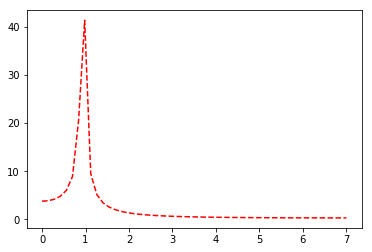

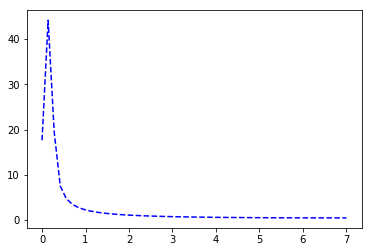

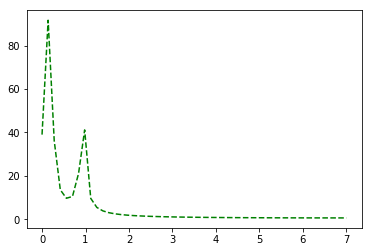

In [31]:
# b) Computation of Fourier transform:

N=100 # FFT length
fft_y1=np.fft.rfft(y1,N)
fft_y2=np.fft.rfft(y2,N)
fft_ys=np.fft.rfft(ys,N)

f = np.linspace(0,(Fs/2),N/2+1) #Frequency space

plt.figure(4);plt.plot(f,np.abs(fft_y1),'r--') # Plot spectrum of x1
plt.figure(5);plt.plot(f,np.abs(fft_y2),'b--') # Plot spectrum of x2
plt.figure(6);plt.plot(f,np.abs(fft_ys),'g--') # Plot spectrum of xS

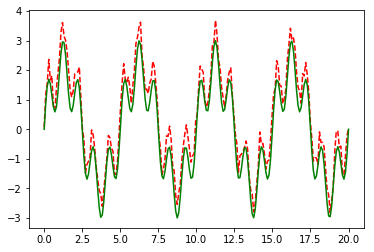

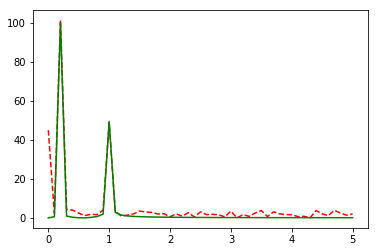

In [4]:
# c) Fourier transform of noisy signal
s=0.8 #amplitude of Gaussian noise
ys_n=ys+s*np.random.rand(len(t))
fft_ys_n=np.fft.rfft(ys_n,N)

plt.figure(7);
plt.plot(t,ys_n,'r--',t,ys,'g-') # Plot for sinusoid with gaussian noise

plt.figure(8);
plt.plot(f,np.abs(fft_ys_n),'r--',f,np.abs(fft_ys),'g-') # Plot for FFT for ys_n

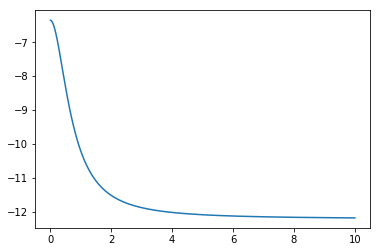

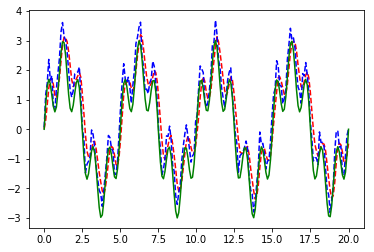

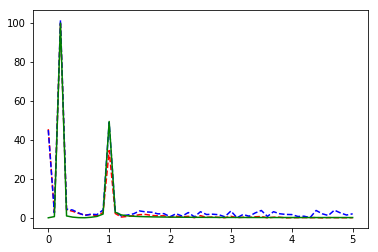

In [5]:
# d) Low-pass filtering of noisy signal

def lowpass_filter(x, lowcut, Fs, filter_order):
    nyquist_freq = 0.5 * Fs
    low = lowcut / nyquist_freq
    b, a = signal.butter(filter_order,low, btype="lowpass")
    y = signal.lfilter(b, a, x)
    return (y,b,a)

(ys_n_smooth,b,a) = lowpass_filter(ys_n,1,Fs,1)
w, h = signal.freqs(b, a);

plt.figure(9);
plt.plot(w, 20 * np.log10(abs(h))) # Plot of spectrum of low-pass filter


plt.figure(10);
plt.plot(t,ys_n_smooth,'r--',t,ys_n,'b--',t,ys,'g-')  # Plot low-pass filter applied to noisy signal


plt.figure(11);
plt.plot(f,np.abs(np.fft.rfft(ys_n_smooth,N)),'r--',f,np.abs(np.fft.rfft(ys_n,N)),'b--',f,np.abs(np.fft.rfft(ys,N)),'g-')